In [1]:
import numpy as np
from os import listdir
import seaborn as sns
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
def plot_figures(base_path, kind="indic_en"):
    sentence_wise_cosine_sim = lambda us, vs: np.mean(np.sum(us * vs, axis=1)/((norm(us, axis=1) * norm(vs, axis=1))+ 1e-8))

    langs, lang_states, langs_enum, states = [], [], [], None

    for i, lang_pair in enumerate(sorted(listdir(base_path))):
        langs.append(lang_pair.split('-')[1])
        with open(f"{base_path}/{lang_pair}/{kind}_encoder_states.npy", "rb") as f_in:
            _states = np.load(f_in)
        langs_enum.extend([i]*len(_states))
        lang_states.append(_states)
        states = _states if states is None else np.concatenate((states, _states))

    sim_mat = np.array([[sentence_wise_cosine_sim(us, vs) for vs in lang_states] for us in lang_states])
    print(f"Mean: {sim_mat.mean()}\nVar: {sim_mat.var()}")

    # plotting heat-map
    title = base_path.split('/')[-1]
    plt.figure(figsize=(10,10))
    sns.heatmap(
        sim_mat, 
        annot=True, 
        linewidths=1.5, 
        linecolor='k', 
        cmap="RdBu", 
        xticklabels=langs, 
        yticklabels=langs
    ).set(title=f'language sentence-wise cos_sim: {title}')
    plt.show()

    # tsne plot encoder states
    states = TSNE(n_jobs=-1).fit_transform(states)
    plt.figure(figsize=(10,10))
    plt.scatter(
        states[:, 0], 
        states[:, 1],
        c=langs_enum,
        cmap=plt.get_cmap('RdBu', max(langs_enum)-min(langs_enum)+1)
    )
    plt.title(f"encoder_states in 2D: {title}")
    cb = plt.colorbar()
    cb.set_ticks(np.arange(0, max(langs_enum), max(langs_enum)/len(langs)))
    cb.set_ticklabels(langs)
    plt.show()

Mean: 0.402099609375
Var: 0.035919189453125


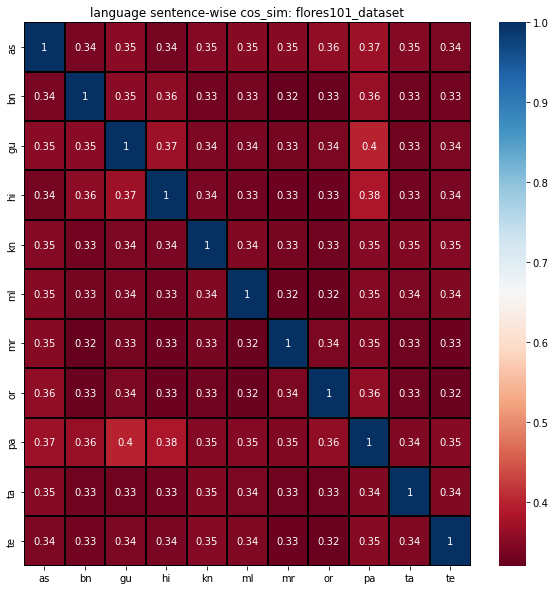

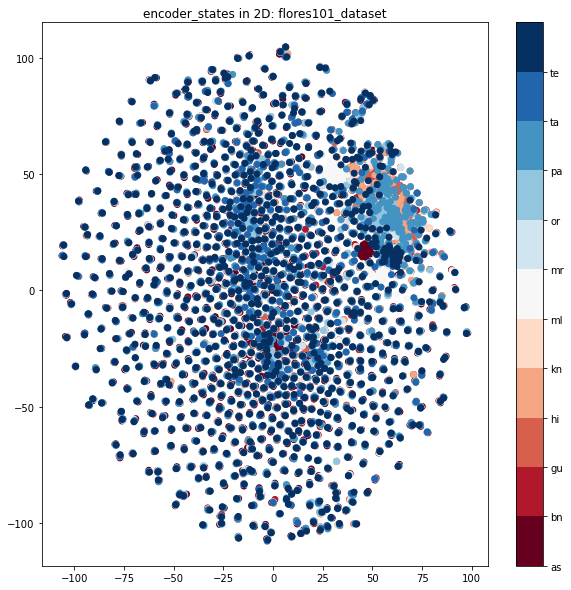

In [3]:
plot_figures("../data/benchmarks/flores101_dataset")

Mean: 0.429443359375
Var: 0.05438232421875


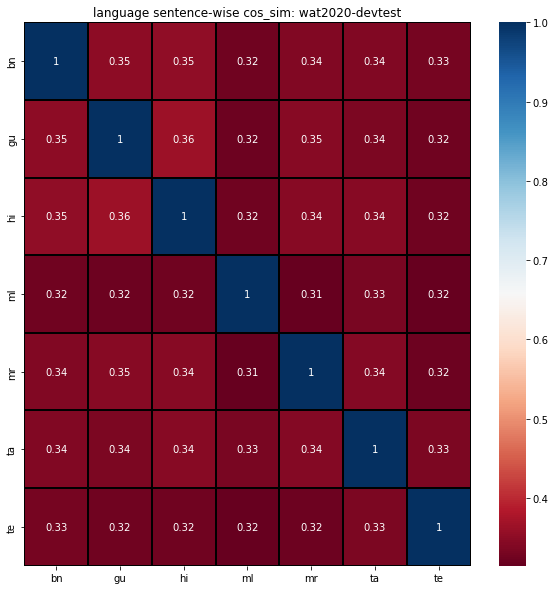

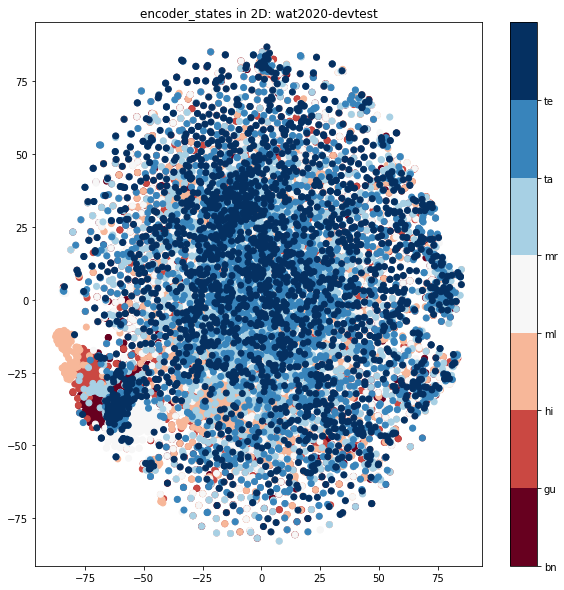

In [4]:
plot_figures("../data/benchmarks/wat2020-devtest")

Mean: 0.359619140625
Var: 0.045867919921875


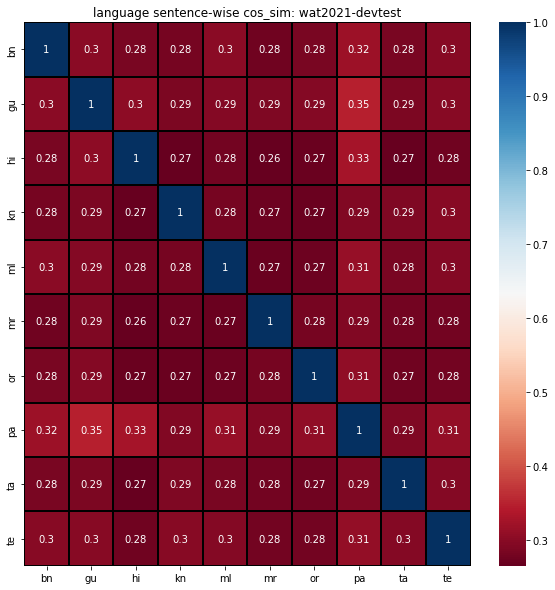

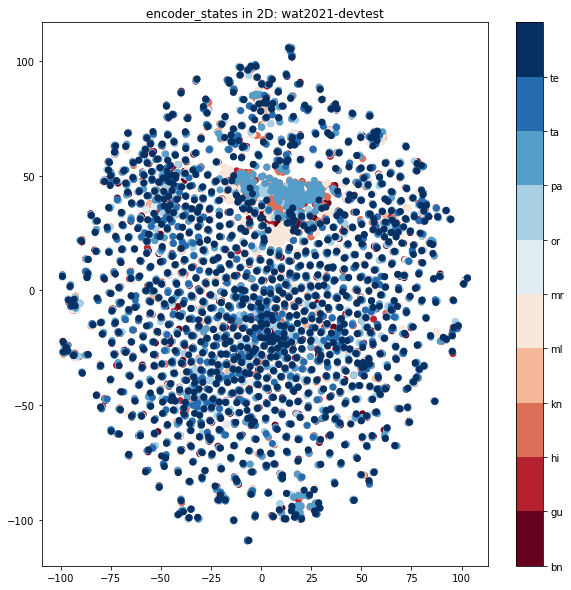

In [5]:
plot_figures("../data/benchmarks/wat2021-devtest")